In [79]:
from cz.io import Data
from cz.data import Preprocess
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import numpy as np

In [80]:
data = Data(clean=True)

Sample size changed from 64320 to 63481


In [81]:
processed_data = Preprocess(data.train_data, data.val_data, data.test_data, deg_seasonality_day=2)

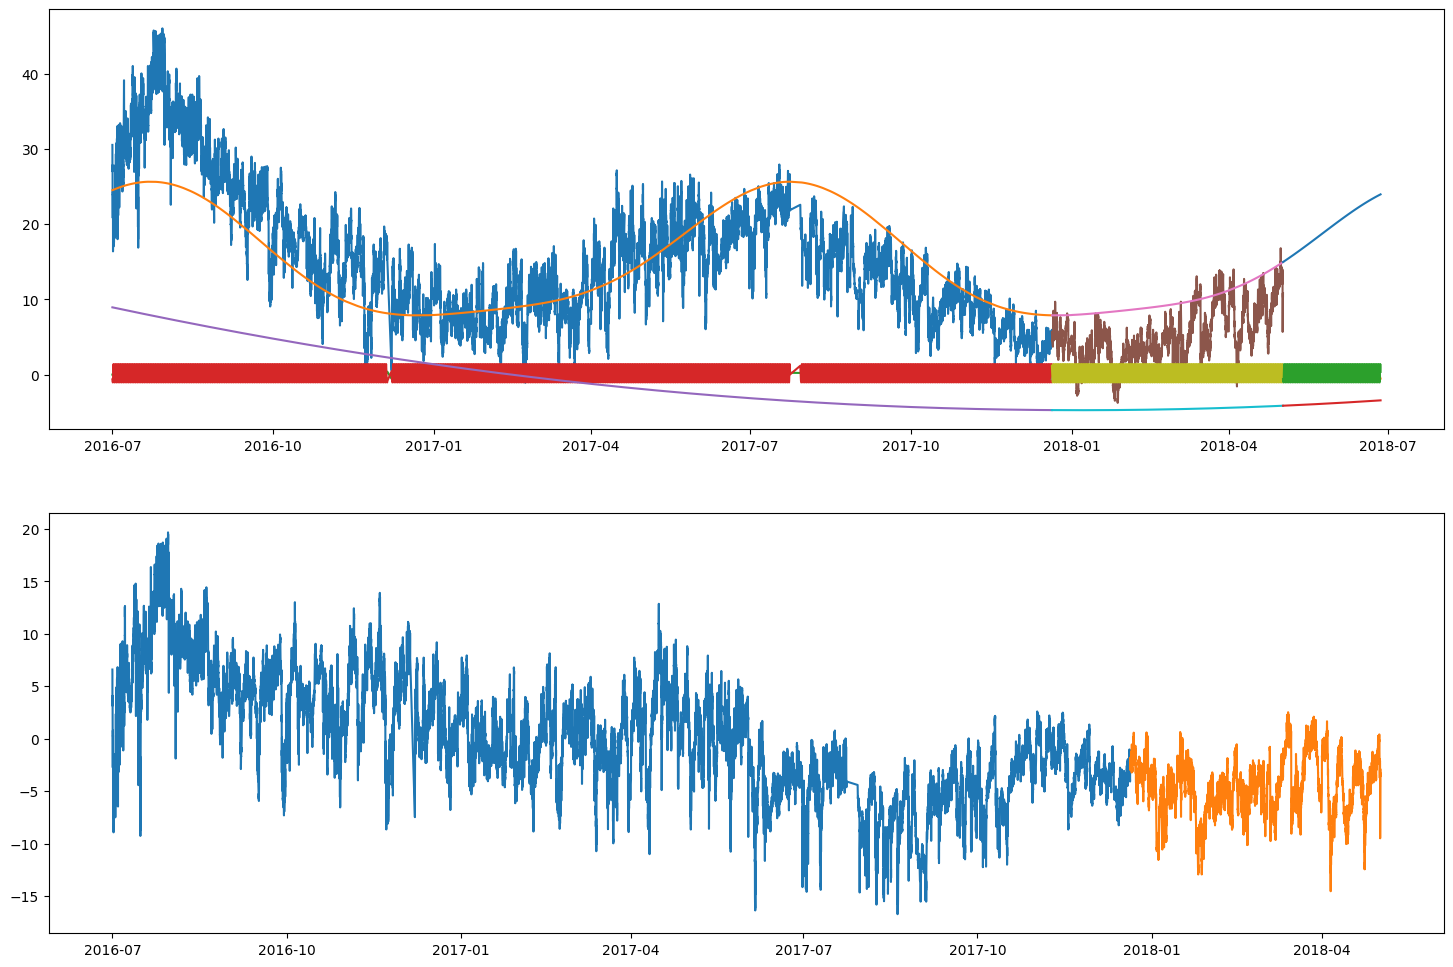

In [82]:
fig, ax= plt.subplots(2,1, figsize=(18,12))

ax[0].plot(processed_data.train_data.date, processed_data.train_data.Temperature)
ax[0].plot(processed_data.train_data.date, processed_data.train_data.seasonality_year)
ax[0].plot(processed_data.train_data.date, processed_data.train_data.seasonality_week)
ax[0].plot(processed_data.train_data.date, processed_data.train_data.seasonality_day)

ax[0].plot(processed_data.train_data.date, processed_data.train_data.trend)

ax[0].plot(processed_data.val_data.date, processed_data.val_data.Temperature)
ax[0].plot(processed_data.val_data.date, processed_data.val_data.seasonality_year)
ax[0].plot(processed_data.val_data.date, processed_data.val_data.seasonality_week)
ax[0].plot(processed_data.val_data.date, processed_data.val_data.seasonality_day)

ax[0].plot(processed_data.val_data.date, processed_data.val_data.trend)

ax[0].plot(processed_data.test_data.date, processed_data.test_data.seasonality_year)
ax[0].plot(processed_data.test_data.date, processed_data.test_data.seasonality_week)
ax[0].plot(processed_data.test_data.date, processed_data.test_data.seasonality_day)


ax[0].plot(processed_data.test_data.date, processed_data.test_data.trend)

ax[1].plot(processed_data.train_data.date, processed_data.train_data.y)
ax[1].plot(processed_data.val_data.date, processed_data.val_data.y)

plt.show()

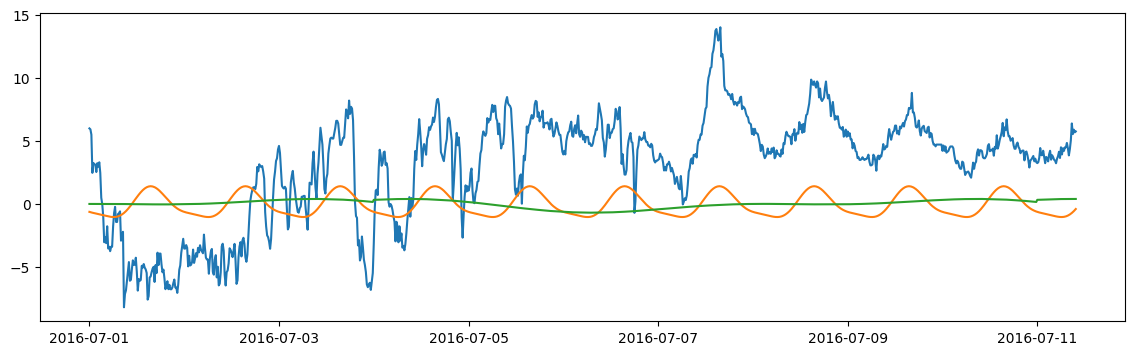

In [83]:
fig, ax = plt.subplots(1, figsize=(14, 4))
ax.plot(processed_data.train_data.date[:1000], processed_data.train_data.y[:1000]+ processed_data.train_data.seasonality_day[:1000]+ processed_data.train_data.seasonality_week[:1000])
ax.plot(processed_data.train_data.date[:1000], processed_data.train_data.seasonality_day[:1000])
ax.plot(processed_data.train_data.date[:1000], processed_data.train_data.seasonality_week[:1000])



In [84]:
feature_list = [f for f in processed_data.train_data.columns if "feature" in f]
feature_list.append("j_day")
feature_list.append("sin_MOY")
feature_list.append("cos_MOY")
feature_list.append("sin_MOW")
feature_list.append("cos_MOW")
feature_list.append("sin_MOD")
feature_list.append("cos_MOD")


In [85]:
x_train = processed_data.train_data.filter(feature_list).values
y_train = processed_data.train_data.filter(["y"]).values

In [86]:
x_val = processed_data.val_data.filter(feature_list).values
y_val = processed_data.val_data.filter(["y"]).values

In [87]:
x_test = processed_data.test_data.filter(feature_list).values


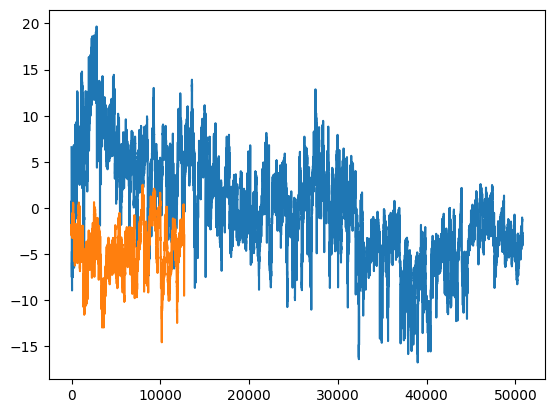

In [88]:
plt.plot(y_train)
plt.plot(y_val)

/Users/mohitanand/miniforge3/envs/code_zero/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


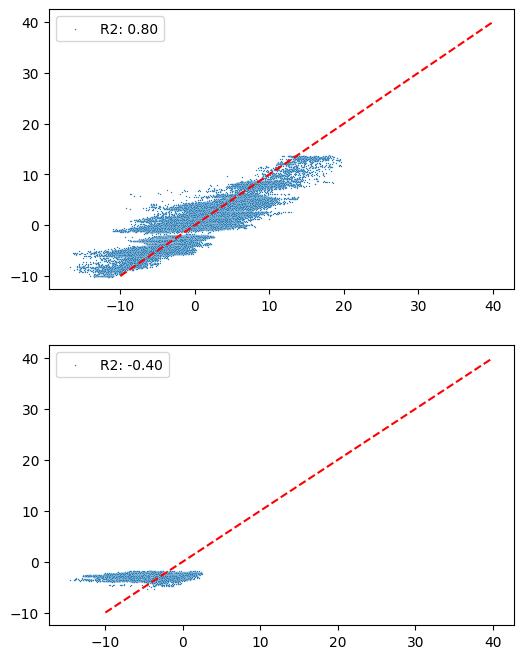

In [129]:
reg = RandomForestRegressor(n_estimators=1000, max_depth = 50, max_leaf_nodes=50, random_state=0, n_jobs=-1, max_features=3, min_samples_split=20)
reg.fit(x_train, y_train)

y_train_pred = reg.predict(x_train).reshape(-1)
y_val_pred = reg.predict(x_val).reshape(-1)

fig, ax = plt.subplots(2, figsize=(6,8))

sns.scatterplot(x = y_train.reshape(-1), y = y_train_pred, ax=ax[0], s=1, label=f"R2: {r2_score(y_train.reshape(-1), y_train_pred):.2f}")
sns.lineplot(x=[-10, 40], y=[-10,40], linestyle="--", color="r", ax=ax[0])
sns.scatterplot(x = y_val.reshape(-1), y = y_val_pred, ax=ax[1], s=1, label=f"R2: {r2_score(y_val.reshape(-1), y_val_pred):.2f}")
sns.lineplot(x=[-10, 40], y=[-10,40], linestyle="--", color="r", ax=ax[1])

plt.show()

In [130]:
bias=0
pred_detrended_test = np.array([est.predict(x_test) for est in reg.estimators_])+bias
pred_test = pred_detrended_test + processed_data.test_data.seasonality_year.values.reshape(1,5360) + processed_data.test_data.seasonality_week.values.reshape(1,5360)  + processed_data.test_data.seasonality_day.values.reshape(1,5360)+ processed_data.test_data.trend.values.reshape(1,5360) 
pred_detrended_val = np.array([est.predict(x_val) for est in reg.estimators_])+bias
pred_val = pred_detrended_val + processed_data.val_data.seasonality_year.values.reshape(1,12697) + processed_data.val_data.seasonality_week.values.reshape(1,12697)  + processed_data.val_data.seasonality_day.values.reshape(1,12697)+ processed_data.val_data.trend.values.reshape(1,12697) 

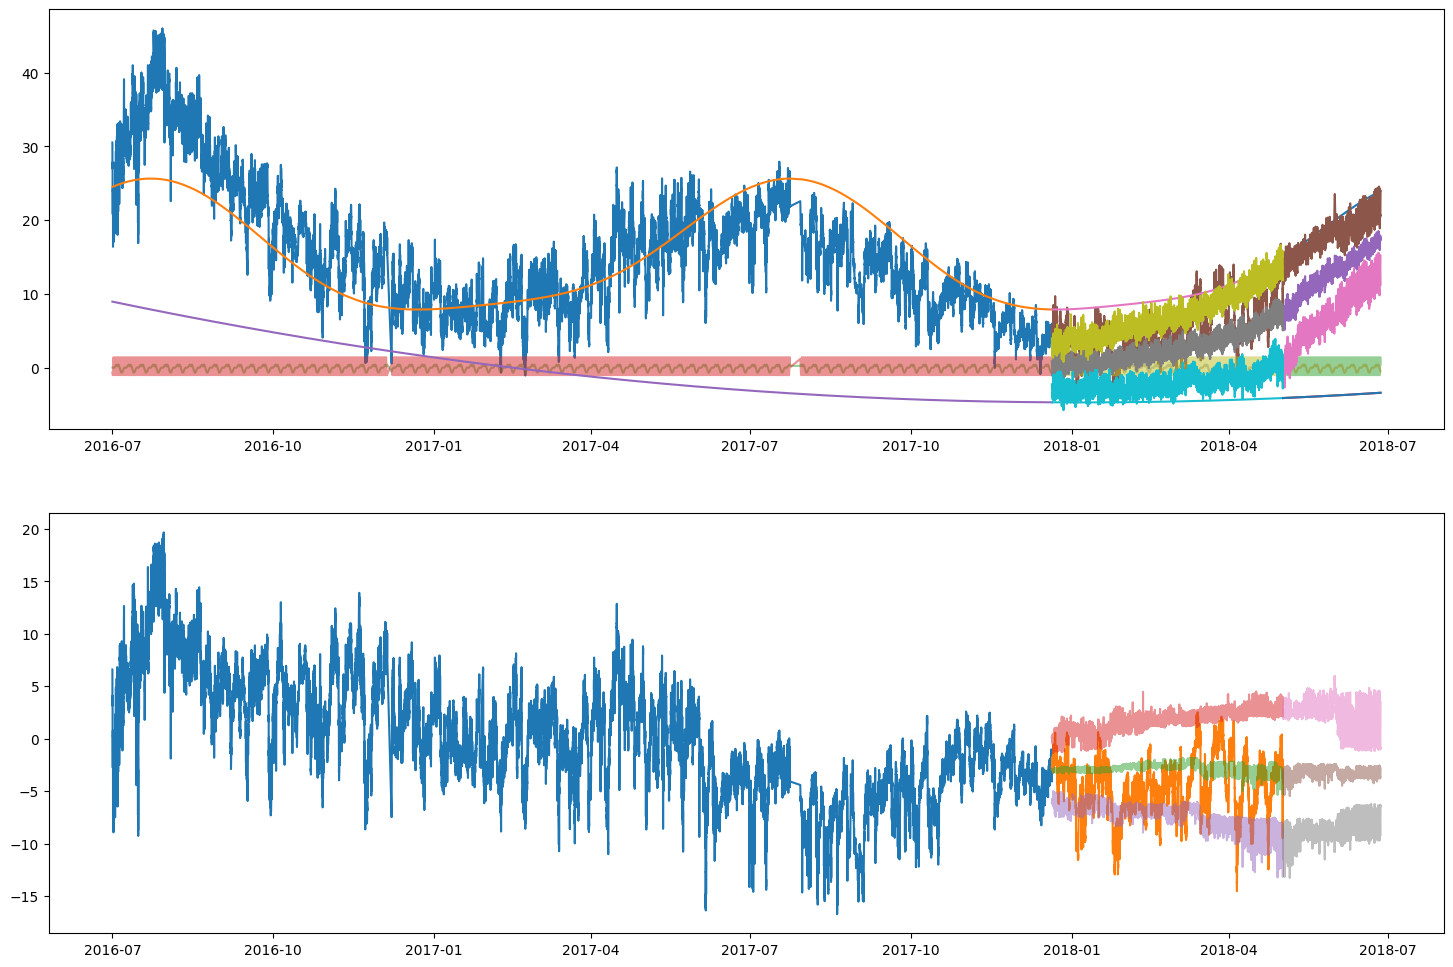

In [131]:
fig, ax= plt.subplots(2,1, figsize=(18,12))

ax[0].plot(processed_data.train_data.date, processed_data.train_data.Temperature)
ax[0].plot(processed_data.train_data.date, processed_data.train_data.seasonality_year)
ax[0].plot(processed_data.train_data.date, processed_data.train_data.seasonality_week, alpha=0.5)
ax[0].plot(processed_data.train_data.date, processed_data.train_data.seasonality_day, alpha=0.5)

ax[0].plot(processed_data.train_data.date, processed_data.train_data.trend)

ax[0].plot(processed_data.val_data.date, processed_data.val_data.Temperature)
ax[0].plot(processed_data.val_data.date, processed_data.val_data.seasonality_year)
ax[0].plot(processed_data.val_data.date, processed_data.val_data.seasonality_week, alpha=0.5)
ax[0].plot(processed_data.val_data.date, processed_data.val_data.seasonality_day, alpha=0.5)

ax[0].plot(processed_data.val_data.date, processed_data.val_data.trend)

ax[0].plot(processed_data.test_data.date, processed_data.test_data.seasonality_year)
ax[0].plot(processed_data.test_data.date, processed_data.test_data.seasonality_week, alpha=0.5)
ax[0].plot(processed_data.test_data.date, processed_data.test_data.seasonality_day, alpha=0.5)

ax[0].plot(processed_data.test_data.date, processed_data.test_data.trend)



ax[0].plot(processed_data.test_data.date, pred_test.mean(0))
ax[0].plot(processed_data.test_data.date, pred_test.mean(0)+2*pred_test.std(0))
ax[0].plot(processed_data.test_data.date, pred_test.mean(0)-2*pred_test.std(0))

ax[0].plot(processed_data.val_data.date, pred_val.mean(0))
ax[0].plot(processed_data.val_data.date, pred_val.mean(0)+2*pred_val.std(0))
ax[0].plot(processed_data.val_data.date, pred_val.mean(0)-2*pred_val.std(0))

ax[0].plot(processed_data.test_data.date, processed_data.test_data.trend)


ax[1].plot(processed_data.train_data.date, processed_data.train_data.y)
ax[1].plot(processed_data.val_data.date, processed_data.val_data.y)

ax[1].plot(processed_data.val_data.date, pred_detrended_val.mean(0), alpha=0.5)
ax[1].plot(processed_data.val_data.date, pred_detrended_val.mean(0)+2*pred_detrended_val.std(0), alpha=0.5)
ax[1].plot(processed_data.val_data.date, pred_detrended_val.mean(0)-2*pred_detrended_val.std(0), alpha=0.5)

ax[1].plot(processed_data.test_data.date, pred_detrended_test.mean(0), alpha=0.5)
ax[1].plot(processed_data.test_data.date, pred_detrended_test.mean(0)+2*pred_detrended_test.std(0), alpha=0.5)
ax[1].plot(processed_data.test_data.date, pred_detrended_test.mean(0)-2*pred_detrended_test.std(0), alpha=0.5)


plt.show()

In [132]:
submission = data.generate_submission(pred_test)

In [133]:
submission.to_csv("submissions/trend_seasonality.csv", index=False)